In [1]:
import os
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# 📁 Set paths
base_dir = r"C:\Users\sagni\Downloads\Email Phising Detector"
model_path = os.path.join(base_dir, "email_model.keras")
vectorizer_path = os.path.join(base_dir, "tfidf_vectorizer.pkl")
label_encoder_path = os.path.join(base_dir, "label_encoder.pkl")

# 🧠 Load model
model = load_model(model_path)

# 🧪 Load vectorizer and label encoder
with open(vectorizer_path, "rb") as f:
    vectorizer = pickle.load(f)

with open(label_encoder_path, "rb") as f:
    label_encoder = pickle.load(f)

# 📝 Input: a new email to classify
new_email = """
Congratulations! You've won a $1000 Amazon gift card. Click here to claim your prize.
"""

# ✨ Preprocess
X_input = vectorizer.transform([new_email]).toarray()

# 🔍 Predict
prediction = model.predict(X_input)
predicted_class = np.argmax(prediction, axis=1)
predicted_label = label_encoder.inverse_transform(predicted_class)

print("🕵️ Prediction:", predicted_label[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
🕵️ Prediction: Phishing Email


Epoch 1/10


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5416 - loss: 139.7956 - val_accuracy: 0.6026 - val_loss: 0.9450
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5508 - loss: 3.1068 - val_accuracy: 0.6046 - val_loss: 0.7044
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5741 - loss: 1.1119 - val_accuracy: 0.5932 - val_loss: 0.6991
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5895 - loss: 1.0184 - val_accuracy: 0.6050 - val_loss: 0.6867
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6046 - loss: 0.8195 - val_accuracy: 0.6036 - val_loss: 0.6805
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6089 - loss: 0.7615 - val_accuracy: 0.6053 - val_loss: 0.6710
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6121 - loss: 0.7336 - val_accuracy: 0.6036 - val_loss: 0.6716
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6076 - loss: 0.7041 - val_accuracy: 0.6036 - va

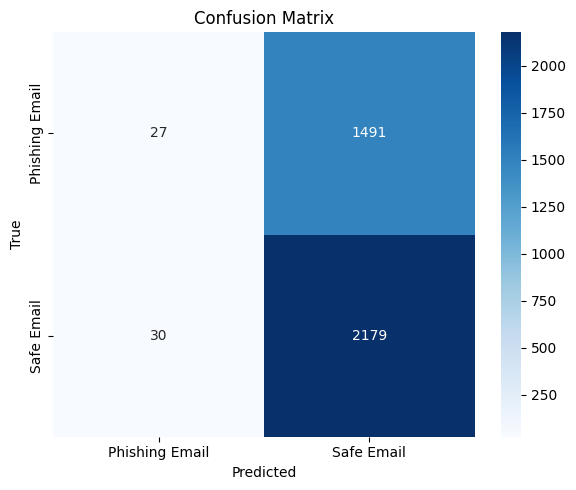

YAML export not supported in this environment: cannot import name 'model_from_yaml' from 'tensorflow.keras.models' (C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\_tf_keras\keras\models\__init__.py)


In [5]:
import pandas as pd
import numpy as np
import os
import pickle
import json
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset with correct path
df = pd.read_csv(r"C:\Users\sagni\Downloads\Email Phising Detector\Phishing_Email.csv")

# ✅ Column names
text_col = 'Email Text'
label_col = 'Email Type'

# Handle missing values
df.dropna(subset=[text_col, label_col], inplace=True)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[label_col])

# Save label encoder
save_dir = r"C:\Users\sagni\Downloads\phishing_email_model"
os.makedirs(save_dir, exist_ok=True)
with open(os.path.join(save_dir, "label_encoder.pkl"), "wb") as f:
    pickle.dump(label_encoder, f)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df[text_col])
X = tokenizer.texts_to_sequences(df[text_col])

# Save tokenizer
with open(os.path.join(save_dir, "tokenizer.pkl"), "wb") as f:
    pickle.dump(tokenizer, f)

# Pad sequences
max_len = 200
X = pad_sequences(X, maxlen=max_len, padding='post')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_len,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

# Evaluate
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))
print("Accuracy:", accuracy_score(y_test, y_pred_binary))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Save model architecture (JSON)
model_json = model.to_json()
with open(os.path.join(save_dir, "model.json"), "w") as json_file:
    json.dump(model_json, json_file)

# ✅ Save model weights (correct filename suffix)
model.save_weights(os.path.join(save_dir, "model.weights.h5"))

# ✅ Save full model
model.save(os.path.join(save_dir, "model.h5"))

# Save architecture in YAML (optional)
try:
    from tensorflow.keras.models import model_from_yaml
    model_yaml = model.to_yaml()
    with open(os.path.join(save_dir, "model.yaml"), "w") as yaml_file:
        yaml_file.write(model_yaml)
except Exception as e:
    print("YAML export not supported in this environment:", e)
